In [1]:
import zipfile
import os

# Path to your zip file
zip_file_path = 'C:/Users/USER/Downloads/GUIDE_Train.csv.zip'

# Path to the directory where you want to extract the files
extract_to_path = 'C:\Cybersecurity'

# Create the extraction directory if it does not exist
os.makedirs(extract_to_path, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

print("Files extracted successfully!")


Files extracted successfully!


#Loading the data

In [4]:
import pandas as pd

# Load the dataset (use chunksize if it's large)
file_path = 'C:/Cybersecurity/GUIDE_Train.csv'
data = pd.read_csv(file_path)

selected_features = ['MitreTechniques', 'Category', 'EntityType', 'LastVerdict','DetectorId', 'AlertTitle','DeviceId', 'IpAddress']

# Prepare the data subset with selected features
data_subset = data[selected_features + ['IncidentGrade']]


In [6]:
# Check the shape of the dataset
print(f"Dataset shape: {data_subset.shape}")

# Display column names and types
print(data_subset.dtypes)

# Show the first few rows
print(data_subset.head())


Dataset shape: (9516837, 9)
MitreTechniques    object
Category           object
EntityType         object
LastVerdict        object
DetectorId          int64
AlertTitle          int64
DeviceId            int64
IpAddress           int64
IncidentGrade      object
dtype: object
  MitreTechniques           Category EntityType LastVerdict  DetectorId  \
0             NaN      InitialAccess         Ip         NaN           7   
1             NaN       Exfiltration       User         NaN          58   
2           T1189      InitialAccess        Url  Suspicious         423   
3             NaN  CommandAndControl        Url  Suspicious           2   
4             NaN          Execution       User         NaN           9   

   AlertTitle  DeviceId  IpAddress   IncidentGrade  
0           6     98799         27    TruePositive  
1          43     98799     360606   FalsePositive  
2         298     98799     360606   FalsePositive  
3           2     98799     360606  BenignPositive  
4       

In [8]:
data_subset.isnull().sum()

MitreTechniques    5468386
Category                 0
EntityType               0
LastVerdict        7282572
DetectorId               0
AlertTitle               0
DeviceId                 0
IpAddress                0
IncidentGrade        51340
dtype: int64

In [10]:
# Fill missing values in categorical columns with "Unknown"
data_subset = data_subset.copy()
data_subset['MitreTechniques'] = data_subset['MitreTechniques'].fillna('Unknown')
data_subset['LastVerdict'] = data_subset['LastVerdict'].fillna('Unknown')


In [12]:
# Calculate the mode for 'IncidentGrade' column
data_subset = data_subset.copy()
mode_value = data_subset['IncidentGrade'].mode()[0]

# Fill null values with the mode
data_subset['IncidentGrade'].fillna(mode_value, inplace=True)
data_subset.isnull().sum()


C:\Users\USER\AppData\Local\Temp\ipykernel_2580\401930506.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_subset['IncidentGrade'].fillna(mode_value, inplace=True)


MitreTechniques    0
Category           0
EntityType         0
LastVerdict        0
DetectorId         0
AlertTitle         0
DeviceId           0
IpAddress          0
IncidentGrade      0
dtype: int64

In [14]:
data_subset['IncidentGrade'].value_counts()

IncidentGrade
BenignPositive    4162157
TruePositive      3322713
FalsePositive     2031967
Name: count, dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder

data_subset = data_subset.copy()  # Create a full copy of the DataFrame to avoid warnings

label_encoder = LabelEncoder()
for column in ['MitreTechniques', 'Category', 'EntityType', 'LastVerdict', 'IncidentGrade']:
    data_subset[column] = label_encoder.fit_transform(data_subset[column].astype(str))


In [18]:
data_subset['IncidentGrade'] = LabelEncoder().fit_transform(data_subset['IncidentGrade'])


In [20]:
print(data_subset.dtypes)

MitreTechniques    int32
Category           int32
EntityType         int32
LastVerdict        int32
DetectorId         int64
AlertTitle         int64
DeviceId           int64
IpAddress          int64
IncidentGrade      int64
dtype: object



Unique Values in Each Categorical Feature:
MitreTechniques: 1194 unique values
Category: 20 unique values
EntityType: 33 unique values
LastVerdict: 6 unique values
DetectorId: 8428 unique values
AlertTitle: 86149 unique values
DeviceId: 75826 unique values
IpAddress: 285957 unique values


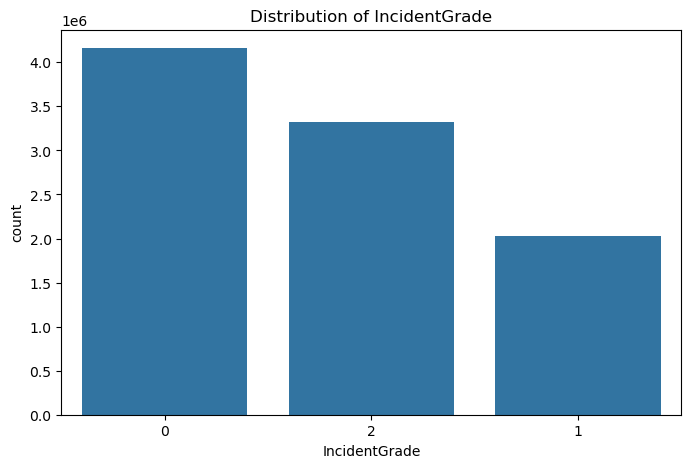

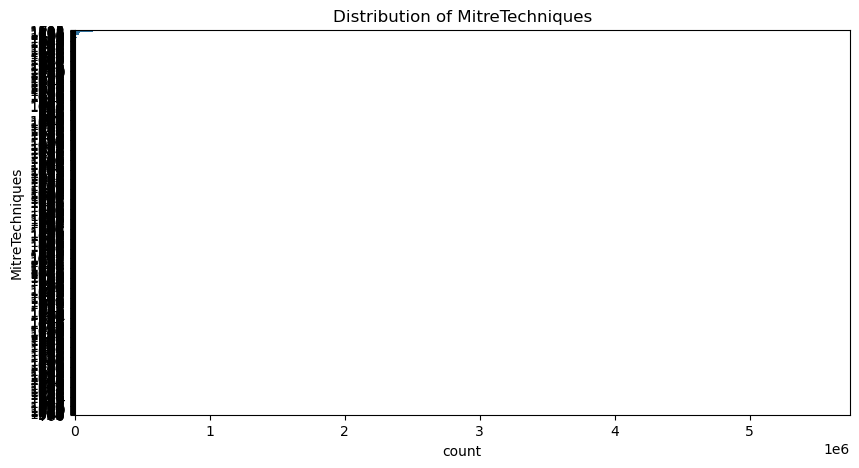

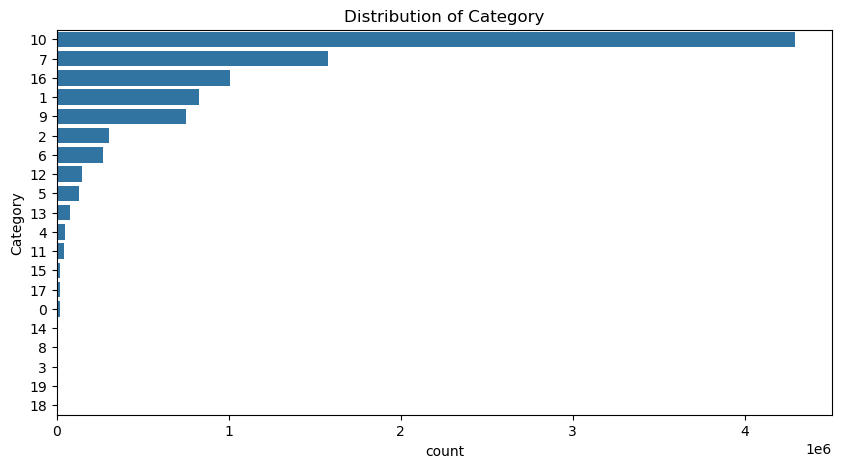

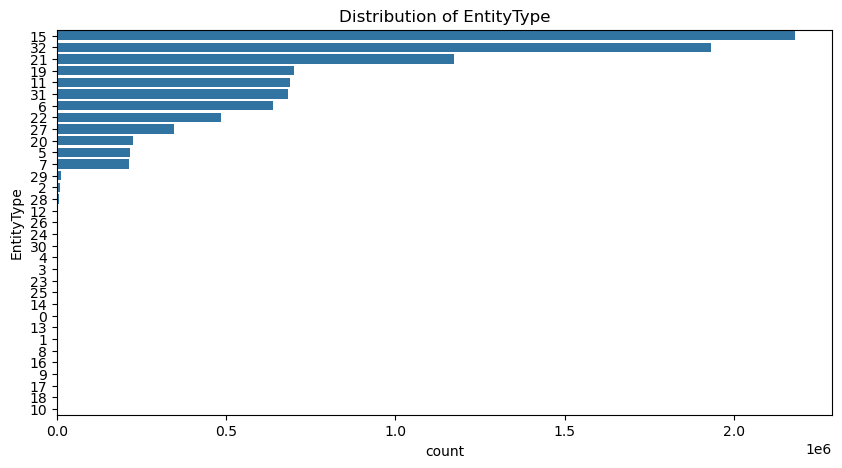

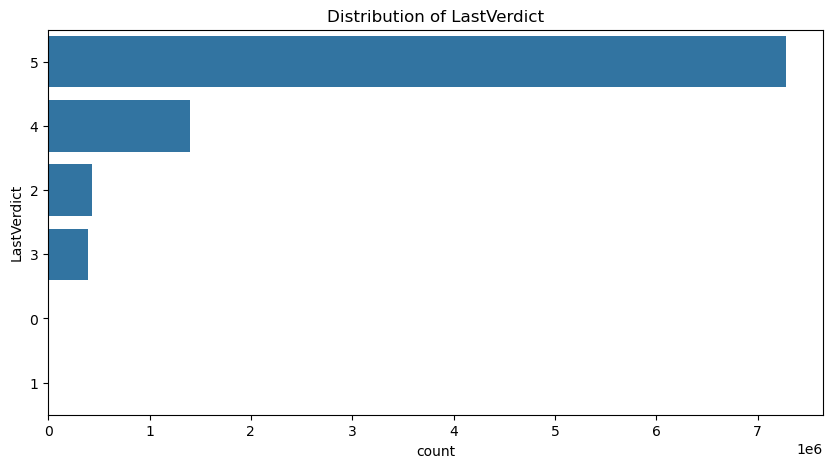

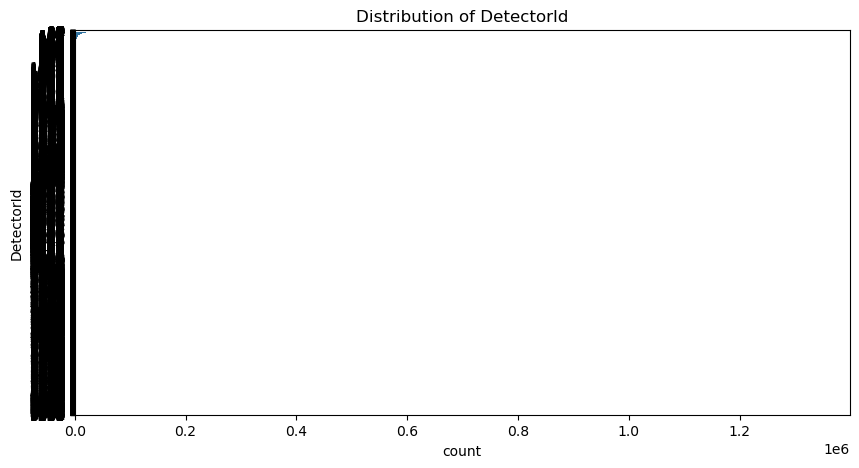

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
# Summary of categorical features
print("\nUnique Values in Each Categorical Feature:")
for col in selected_features:
    print(f"{col}: {data_subset[col].nunique()} unique values")

# IncidentGrade Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=data_subset, x='IncidentGrade', order=data_subset['IncidentGrade'].value_counts().index)
plt.title('Distribution of IncidentGrade')
plt.show()

# Visualize the distribution of each categorical feature
for col in selected_features[:-1]:  # Exclude IncidentGrade from features
    plt.figure(figsize=(10, 5))
    sns.countplot(y=data_subset[col], order=data_subset[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.show()

# Analyze the relationship between categorical features and IncidentGrade
for col in selected_features[:-1]:  # Exclude IncidentGrade from features
    plt.figure(figsize=(12, 6))
    sns.countplot(data=data_subset, x=col, hue='IncidentGrade', order=data_subset[col].value_counts().index)
    plt.title(f'{col} vs IncidentGrade')
    plt.xticks(rotation=90)
    plt.show()

#Balancing the data set

In [27]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize random undersampler
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)


In [25]:
from imblearn.over_sampling import RandomOverSampler


# Separate features and target
X = data_subset.drop('IncidentGrade', axis=1)
y = data_subset['IncidentGrade']

# Initialize random oversampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)


In [31]:
#LOGISTIC REGRESSION

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the scaler and scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model
logreg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = logreg.predict(X_test_scaled)
y_proba = logreg.predict_proba(X_test_scaled)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate and print ROC-AUC score
roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
print("ROC-AUC Score:", roc_auc)


Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.57      0.52    406249
           1       0.37      0.17      0.23    405914
           2       0.45      0.61      0.51    407018

    accuracy                           0.45   1219181
   macro avg       0.43      0.45      0.42   1219181
weighted avg       0.43      0.45      0.42   1219181

ROC-AUC Score: 0.66577167949173


In [ ]:
#RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Initialize Random Forest with class weights
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)

print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
print("ROC-AUC Score:", roc_auc)


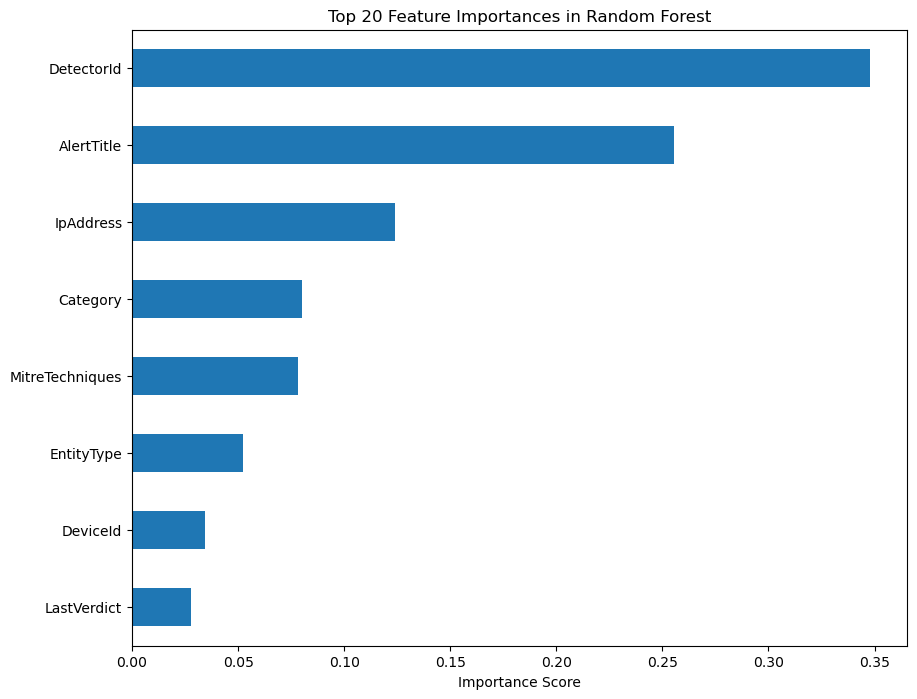

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Initialize and fit the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
feature_importances.head(8).plot(kind='barh')
plt.title("Top 20 Feature Importances in Random Forest")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.show()


In [41]:
from xgboost import XGBClassifier

# Initialize XGBoost with scale_pos_weight
xgb_model = XGBClassifier(scale_pos_weight=10, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)

print("XGBoost Classification Report:\n", classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
print("ROC-AUC Score:", roc_auc)


C:\Users\USER\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:26:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.83      0.77    406249
           1       0.76      0.68      0.72    405914
           2       0.77      0.73      0.75    407018

    accuracy                           0.75   1219181
   macro avg       0.75      0.75      0.74   1219181
weighted avg       0.75      0.75      0.74   1219181

ROC-AUC Score: 0.913682700287142


#GRADIENT BOOSTING

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = gb_model.predict(X_test)
y_proba = gb_model.predict_proba(X_test)

print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
print("ROC-AUC Score:", roc_auc)


Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.80      0.72    406249
           1       0.73      0.57      0.64    405914
           2       0.72      0.71      0.71    407018

    accuracy                           0.69   1219181
   macro avg       0.70      0.69      0.69   1219181
weighted avg       0.70      0.69      0.69   1219181

ROC-AUC Score: 0.8687939320390745


In [ ]:
#PICKLING FOR STORING THE FINAL MODEL-As random forest shows a greater accuracy,I prefered Random forest

In [35]:
import pickle

# Save the trained model
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)
